# Mental Health Depression Detection Using Machine Learning

This project aims to detect whether a person is likely to be depressed based on personal, medical, and behavioral data such as mood, energy levels, sleep quality, appetite, and signs of sadness.

## Dataset Details:
- 5000 rows of synthetically generated yet realistic data
- Includes demographic, clinical, and behavioral symptom indicators
- Textual categories for symptoms:
  - **Mood:** Normal / High / Low
  - **Energy:** Moderate / High / Low
  - **Sleep:** Normal / Excessive / Poor
  - **Appetite:** Normal / High / Low
  - **Sadness:** Moderate / High / Low

## Target:
- `Depression`: Depressed vs Not Depressed


In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

## Data Collection and Preprocessing

In [2]:
# Load the dataset
df = pd.read_csv('mental_health.csv')

In [3]:
# First five rows of the dataset
df.head()

,Mood,Energy,Sleep,Appetite,Sadness,Depression
0,normal,high,poor,normal,low,Not Depressed
1,normal,low,poor,high,moderate,Depressed
2,low,high,poor,normal,high,Depressed
3,low,high,poor,low,high,Depressed
4,normal,moderate,excessive,normal,low,Depressed


In [4]:
# number of rows and columns
df.shape

(5000, 6)

In [5]:
# Number of missing values in each column
df.isnull().sum()

Mood          0
Energy        0
Sleep         0
Appetite      0
Sadness       0
Depression    0
dtype: int64

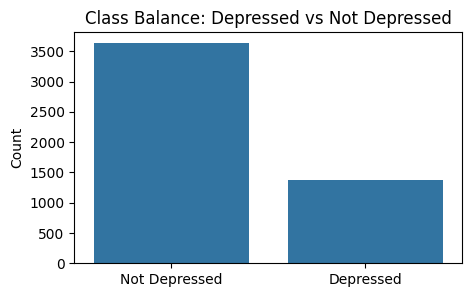

In [6]:
# Class Balance - How many are Depressed vs Not Depressed
plt.figure(figsize=(5,3))
sns.countplot(x="Depression", data=df)
plt.title('Class Balance: Depressed vs Not Depressed')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [7]:
# encode categorical columns
df.replace({
    'Mood':{'low':0,'high':1,'normal':2},
    'Energy':{'low':0,'high':1,'moderate':2},
    'Sleep':{'poor':0,'excessive':1,'normal':2},
    'Appetite':{'low':0,'high':1,'normal':2},
    'Sadness':{'low':0,'high':1,'moderate':2},
    'Depression':{'Not Depressed':0, 'Depressed':1},
},inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_840\681254052.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [8]:
df.head()

,Mood,Energy,Sleep,Appetite,Sadness,Depression
0,2,1,0,2,0,0
1,2,0,0,1,2,1
2,0,1,0,2,1,1
3,0,1,0,0,1,1
4,2,2,1,2,0,1


We can't feed textual data directly into models, ML algorithms typically require numerical input data to perform calculation and prediction. So we have convert categorical columns to numerical values to use them in ML models and improve the accuracy.
- Feaures:
  - `Mood`: 2=Normal, 1=High, 0=Low
  - `Energy:` 2=Moderate, 1=High, 0=Low
  - `Sleep:` 2=Normal, 1=Excessive, 0=Poor
  - `Appetite:` 2=Normal, 1=High, 0=Low
  - `Sadness:` 2=Moderate, 1=High, 0=Low

- Target:
    - `Depression`: 1=Depressed, 0=Not Depressed

In [9]:
# Separating the data and label
X = df.drop(columns='Depression',axis=1)
Y = df['Depression']

In [10]:
print(X)

      Mood  Energy  Sleep  Appetite  Sadness
0        2       1      0         2        0
1        2       0      0         1        2
2        0       1      0         2        1
3        0       1      0         0        1
4        2       2      1         2        0
...    ...     ...    ...       ...      ...
4995     2       1      1         0        1
4996     0       2      2         1        0
4997     0       2      0         1        0
4998     1       0      2         1        0
4999     2       2      0         0        1

[5000 rows x 5 columns]


## Train a ML Model

In [11]:
# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [12]:
# Train model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

## Model Evoluation

In [13]:
# Accuracy on train data
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction,Y_train)

print('Accuracy score on train data: ', train_data_accuracy)

Accuracy score on train data:  0.8985


In [14]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on test data: ', test_data_accuracy)

Accuracy score on test data:  0.887


In [15]:
Y_prediction = model.predict(X_test)
print(classification_report(Y_test, Y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       719
           1       0.90      0.67      0.77       281

    accuracy                           0.89      1000
   macro avg       0.89      0.82      0.85      1000
weighted avg       0.89      0.89      0.88      1000



- The dataset is preprocessed, encoded, split, and used to train a Random Forest Classifier to predict depression with realistic **accuracy (~90%)**.

## Predictive System

In [16]:
# predictive system
def predict_depression(mood, energy, sleep, appetite, sadness):
    text_to_num ={'low':0, 'high':1, 'normal':2, 'moderate':2, 'excessive':1, 'poor':0}
    input_data = [[
        text_to_num[mood],
        text_to_num[energy],
        text_to_num[sleep],
        text_to_num[appetite],
        text_to_num[sadness]
    ]]
    prediction = model.predict(input_data)
    return "The Person is **Depressed** \n" if prediction[0] == 1 else "The Person is **Depressed**\n"
# example
result = predict = predict_depression('low','low','normal','low','moderate')
print('The system predicts: ', result)

The system predicts:  The Person is **Depressed** 



C:\Users\PMLS\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Conclucion
This project demonstrates the development of a simple yet effective machine learning-based system for predicting the likelihood of depression based on five key behavioral and emotional indicators: **Mood, Energy, Sleep, Appetite, and Sadness.**

By converting human emotional states into a structured dataset and applying a supervised learning algorithm (Random Forest Classifier), the model achieves strong predictive performance, with around **90% accuracy**, making it a reliable tool for preliminary mental health screening.

While the system is not a replacement for professional diagnosis, it can serve as an early indicator and help raise awareness about mental well-being. The model shows how AI can be used to support mental health initiatives and build data-driven solutions in healthcare.